<a href="https://colab.research.google.com/github/richaranjan04/Python-for-datascience-and-machine-learning/blob/master/DC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display


In [ ]:
crowdfunding = pd.read_csv('data/crowdfunding.csv')
crowdfunding.head()

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61.0
1,Sports,android,M,18-24,31.0
2,Technology,android,M,18-24,39.0
3,Technology,iOS,M,18-24,36.0
4,Sports,android,M,18-24,40.0


In [ ]:
total_donation = crowdfunding['amount'].sum()
total_donation

per_donation_by_category = pd.crosstab(index=crowdfunding['category'],
                              columns=['Percentage %'],
                              values= crowdfunding['amount'],
                              aggfunc=lambda x:(x.sum() / total_donation) * 100)


per_donation_by_category = per_donation_by_category.round(2)

per_donation_by_category_sorted = per_donation_by_category.sort_values(by='Percentage %', ascending=False)

donation_by_category = pd.crosstab(index=crowdfunding["category"], columns = ["sum"], values=crowdfunding['amount'], aggfunc='sum')
donation_by_category.columns = ['Total Amount Donated']

donation_by_category.sort_values('Total Amount Donated', ascending = False)


left_join = pd.merge(donation_by_category,       # First table
                    per_donation_by_category_sorted,        # Second table
                    how="left",   # Merge method
                    on="category")     # Column(s) to join on

left_join = left_join.rename_axis("Top 3 Category")

display(left_join.sort_values('Total Amount Donated', ascending = False).head(3))


,Total Amount Donated,Percentage %
Top 3 Category,,
Games,165483.0,20.33
Sports,163528.0,20.09
Technology,162731.0,19.99


In [ ]:
donation_by_device = pd.crosstab(index=crowdfunding["device"], columns= sum(crowdfunding['amount']))
donation_by_device.columns = ["Total Amount Donated"]
donation_by_device.sort_values('Total Amount Donated', ascending = False)
donation_by_device = donation_by_device.rename_axis("Device")
display(donation_by_device)


,Total Amount Donated
Device,
android,7199
iOS,13459


In [ ]:
donation_by_age_and_device = pd.crosstab(index=crowdfunding['age'], columns=crowdfunding['device'], values=crowdfunding['amount'], aggfunc='sum')
donation_by_age_and_device = donation_by_age_and_device.rename_axis("Age")

display(donation_by_age_and_device)


device,android,iOS
Age,,
18-24,144840.0,266237.0
25-34,34061.0,65702.0
35-44,34980.0,70617.0
45-54,35284.0,63411.0
55+,34380.0,64558.0


In [ ]:
donation_by_device_and_gender = pd.crosstab(index=crowdfunding['category'], columns=crowdfunding['gender'], values=crowdfunding['amount'], aggfunc='sum')
donation_by_device_and_gender.columns = ['Female', 'Male', 'Would prefer not to say']
donation_by_device_and_gender = donation_by_device_and_gender.rename_axis("Category")

display(donation_by_device_and_gender)

,Female,Male,Would prefer not to say
Category,,,
Environment,75427.0,73842.0,13107.0
Fashion,73784.0,76100.0,10068.0
Games,76652.0,77511.0,11320.0
Sports,77372.0,74640.0,11516.0
Technology,75544.0,75460.0,11727.0


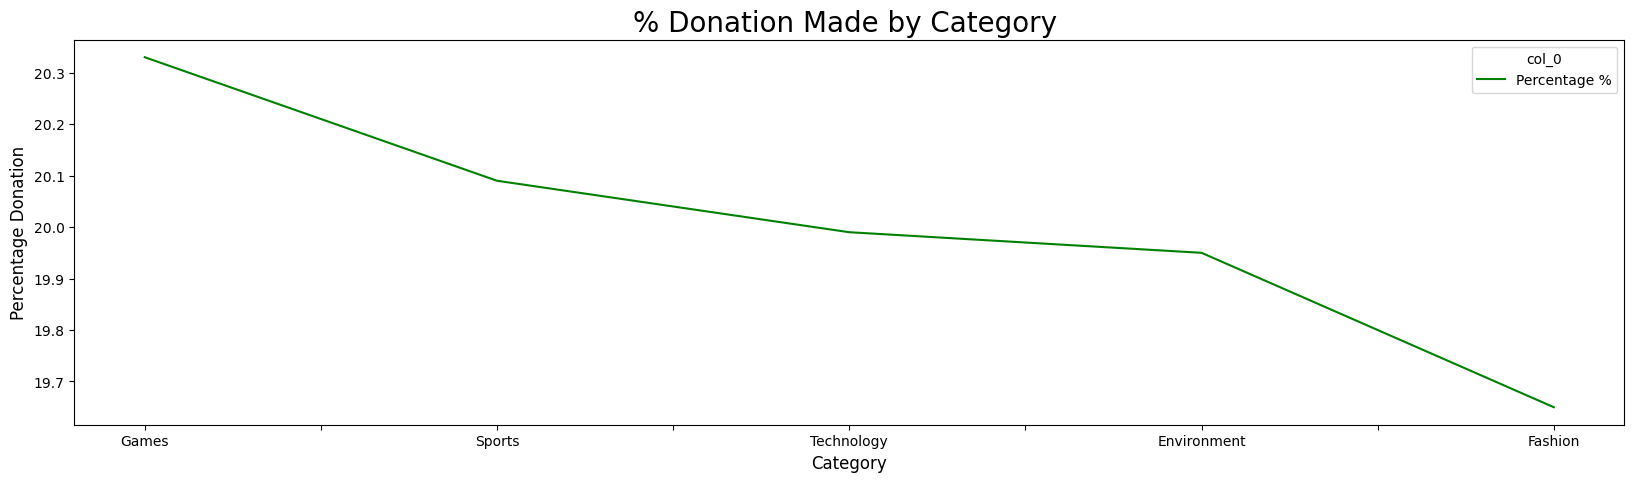

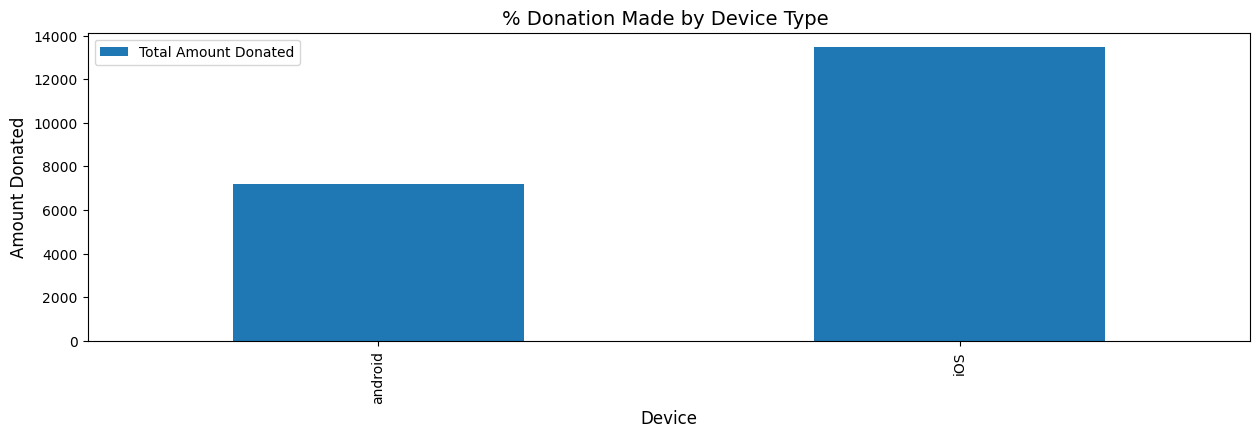

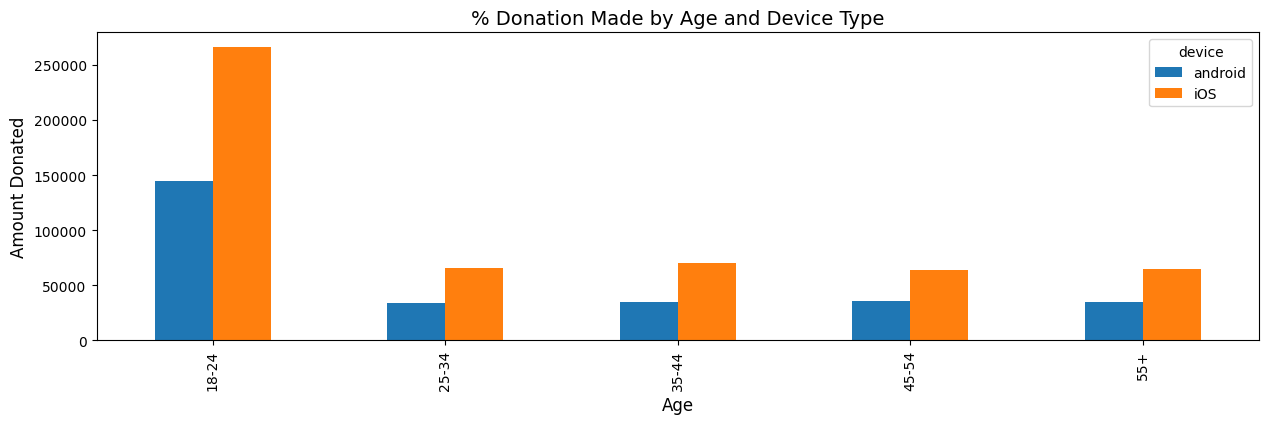

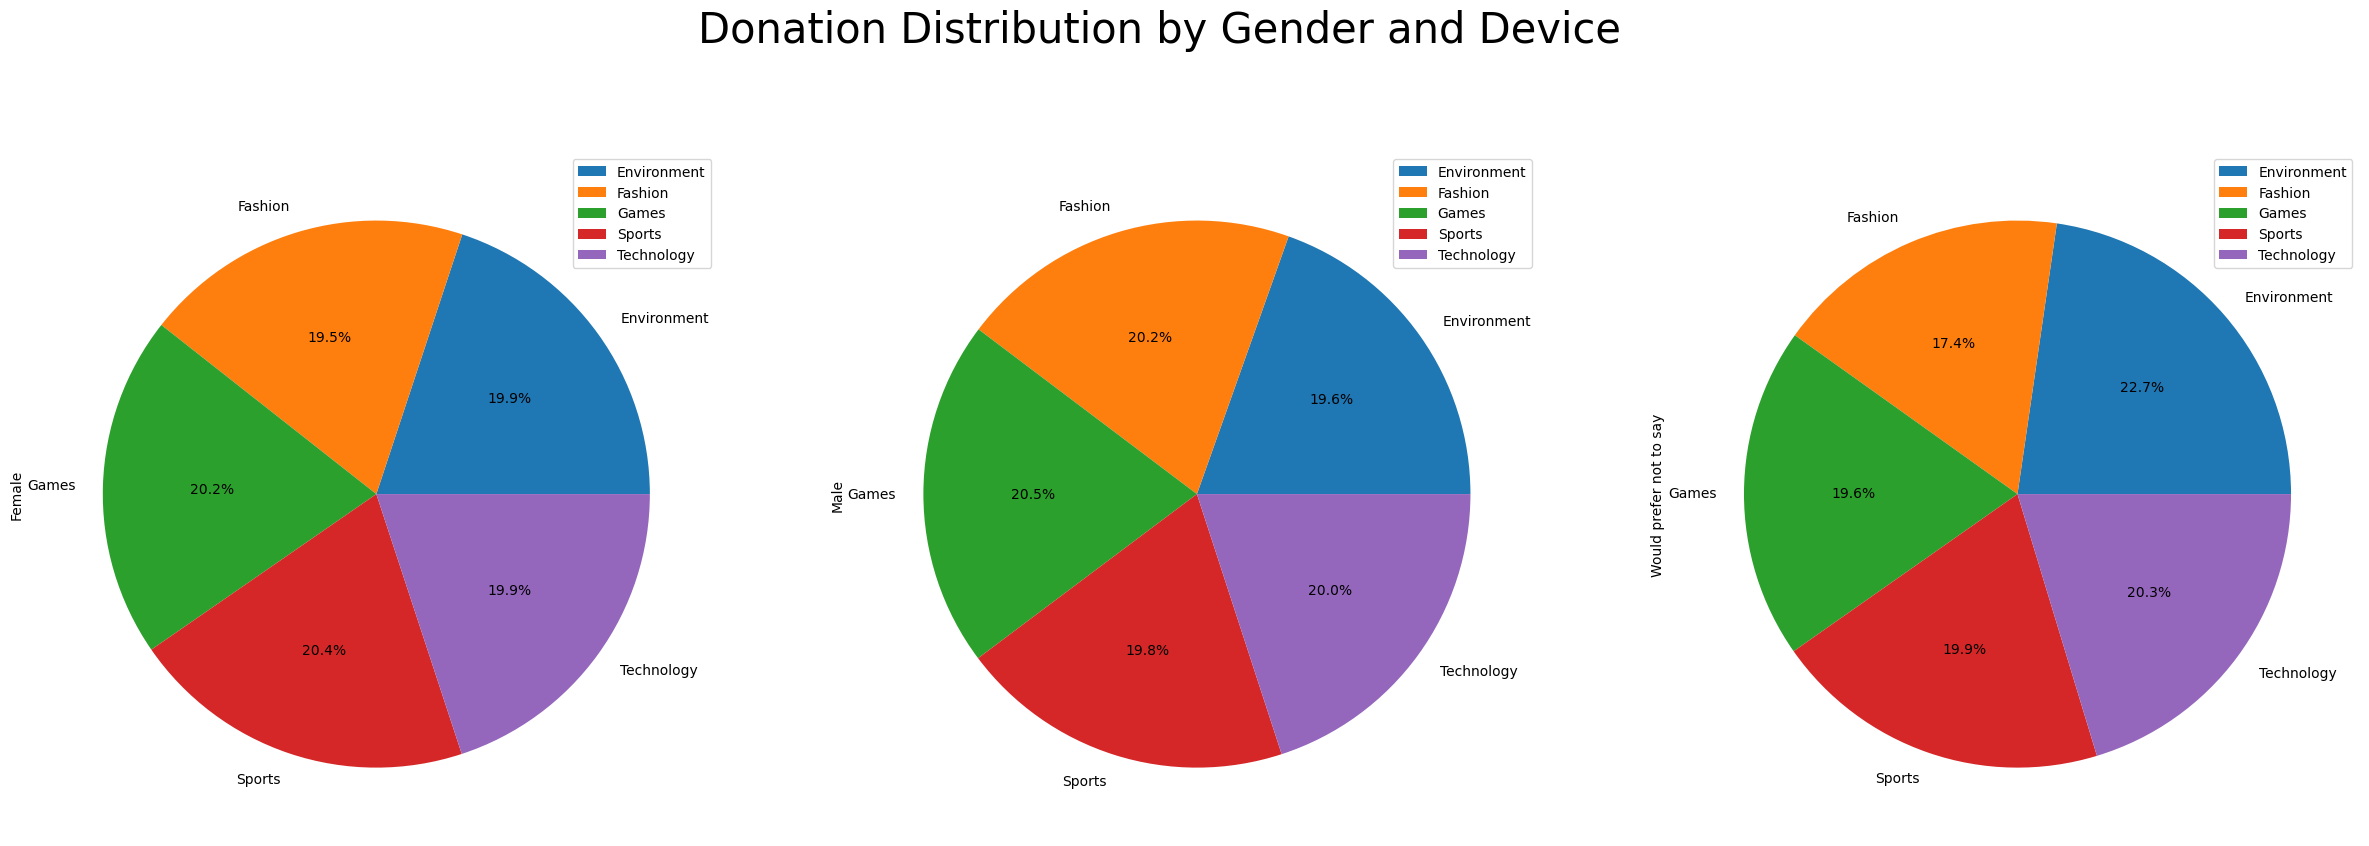

In [ ]:
per_donation_by_category_sorted.plot(kind="line",figsize=(20,5), color="green")
plt.xlabel('Category',fontsize=12)
plt.ylabel('Percentage Donation',fontsize=12)
plt.title('% Donation Made by Category ', fontsize=20)


donation_by_device.plot(kind = "bar",figsize=(15,4))
plt.xlabel('Device',fontsize=12)
plt.ylabel('Amount Donated',fontsize=12)
plt.title('% Donation Made by Device Type ', fontsize=14)

donation_by_age_and_device.plot(kind = 'bar',figsize=(15,4), stacked = False)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Amount Donated',fontsize=12)
plt.title('% Donation Made by Age and Device Type', fontsize=14)

donation_by_device_and_gender.plot.pie(subplots=True, figsize=(30, 10), autopct='%1.1f%%')
plt.suptitle('Donation Distribution by Gender and Device',fontsize = 30)
plt.show()

